In [1]:
# 导入必要的库
import pandas as pd  # 用于数据处理
import numpy as np  # 用于数值计算
import json  # 用于处理JSON格式数据
# 绘图
import matplotlib.pyplot as plt  # 用于生成图表
from mplsoccer import VerticalPitch  # 专门用于足球比赛相关的图表绘制
# 统计模型拟合
import statsmodels.api as sm  # 提供广泛的统计模型
import statsmodels.formula.api as smf  # 通过公式形式拟合统计模型
# 打开数据文件
import os  # 用于操作系统相关的功能，如路径管理
import pathlib  # 用于更高层次的路径操作
import warnings  # 用于控制警告的显示

# 设置Pandas链式赋值模式为None，以忽略相关警告
pd.options.mode.chained_assignment = None
# 忽略警告信息
warnings.filterwarnings('ignore')

In [2]:
# 加载数据 - 存储到train数据框中
train = pd.DataFrame()  # 初始化一个空的数据框
# 准备空的数据框
path = os.path.join(str(pathlib.Path().resolve()), 'data', 'events','events_England.json')  # 拼接数据文件路径

# 打开JSON文件并读取数据
with open(path) as f:  # 打开指定路径的JSON文件
    data = json.load(f)  # 加载JSON数据到变量data中

# 将数据转换为Pandas DataFrame
train = pd.DataFrame(data)

# 查看数据框的基本信息，如列名、数据类型和内存占用
train['index'] = train.index

In [3]:
train.loc[0]

eventId                                                8
subEventName                                 Simple pass
tags                                      [{'id': 1801}]
playerId                                           25413
positions       [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]
matchId                                          2499719
eventName                                           Pass
teamId                                              1609
matchPeriod                                           1H
eventSec                                        2.758649
subEventId                                            85
id                                             177959171
index                                                  0
Name: 0, dtype: object

In [4]:
train

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,index
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171,0
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172,1
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173,2
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174,3
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409,643145
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232,643146
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410,643147
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234,643148


In [5]:
shotsA = train.loc[train['eventId'] == 10]
shotsA

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,index
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,46
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,62
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,91
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289,128
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642945,10,Shot,"[{'id': 401}, {'id': 1212}, {'id': 1802}]",8561,"[{'y': 45, 'x': 72}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,1972.969422,100,251596053,642945
643023,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",41174,"[{'y': 33, 'x': 86}, {'y': 0, 'x': 0}]",2500098,Shot,1633,2H,2193.887080,100,251596096,643023
643051,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",7879,"[{'y': 62, 'x': 88}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2377.197700,100,251596357,643051
643055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",145692,"[{'y': 38, 'x': 92}, {'y': 100, 'x': 100}]",2500098,Shot,1623,2H,2381.481625,100,251596359,643055


In [6]:
Ppre_shots = train.loc[shotsA['index']-1]
Ppre_shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,index
45,8,Cross,"[{'id': 301}, {'id': 402}, {'id': 801}, {'id':...",120339,"[{'y': 71, 'x': 73}, {'y': 41, 'x': 88}]",2499719,Pass,1609,1H,93.961235,80,177959211,45
61,1,Air duel,"[{'id': 703}, {'id': 1801}]",120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",2499719,Duel,1609,1H,178.317724,10,177959224,61
90,1,Air duel,"[{'id': 703}, {'id': 1801}]",14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",2499719,Duel,1631,1H,254.036308,10,177959279,90
127,7,Acceleration,[{'id': 1801}],7868,"[{'y': 18, 'x': 59}, {'y': 33, 'x': 81}]",2499719,Others on the ball,1609,1H,423.759467,70,177959288,127
248,1,Ground defending duel,"[{'id': 501}, {'id': 1601}, {'id': 701}, {'id'...",192748,"[{'y': 49, 'x': 26}, {'y': 70, 'x': 25}]",2499719,Duel,1631,1H,814.004042,12,177959450,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642944,1,Air duel,"[{'id': 701}, {'id': 1802}]",379209,"[{'y': 56, 'x': 97}, {'y': 45, 'x': 72}]",2500098,Duel,1633,2H,1969.753817,10,251596052,642944
643022,1,Ground defending duel,"[{'id': 502}, {'id': 701}, {'id': 1802}]",0,"[{'y': 71, 'x': 13}, {'y': 67, 'x': 14}]",2500098,Duel,1623,2H,2192.338946,12,251596985,643022
643050,8,Smart pass,"[{'id': 302}, {'id': 901}, {'id': 1801}]",145692,"[{'y': 41, 'x': 73}, {'y': 62, 'x': 88}]",2500098,Pass,1623,2H,2375.561699,86,251596355,643050
643054,1,Air duel,"[{'id': 703}, {'id': 1801}]",8313,"[{'y': 57, 'x': 5}, {'y': 62, 'x': 8}]",2500098,Duel,1633,2H,2381.046573,10,251596102,643054


In [7]:
# 获取射门位置坐标并分别存储在X和Y列中
shotsA["AX"] = shotsA.positions.apply(lambda cell: (100 - cell[0]['x']) * 105/100)  # 计算射门的X坐标并转换为球场尺度（105米）
shotsA["AY"] = shotsA.positions.apply(lambda cell: cell[0]['y'] * 68/100)  # 计算射门的Y坐标并转换为球场尺度（68米）
shotsA["AC"] = shotsA.positions.apply(lambda cell: abs(cell[0]['y'] - 50) * 68/100)  # 计算射门与球场中线（Y=50）之间的垂直距离

# 计算射门距离和角度
shotsA["ADistance"] = np.sqrt(shotsA["AX"]**2 + shotsA["AC"]**2)  # 使用勾股定理计算射门距离
shotsA["AAngle"] = np.where(np.arctan(7.32 * shotsA["AX"] / (shotsA["AX"]**2 + shotsA["AC"]**2 - (7.32/2)**2)) > 0,
                          np.arctan(7.32 * shotsA["AX"] /(shotsA["AX"]**2 + shotsA["AC"]**2 - (7.32/2)**2)),
                          np.arctan(7.32 * shotsA["AX"] /(shotsA["AX"]**2 + shotsA["AC"]**2 - (7.32/2)**2)) + np.pi)
# 计算射门角度（使用球门的宽度7.32米）

# 如果在建模过程中遇到依赖变量0和1颠倒的问题，可以将目标变量转换为object类型
shotsA["Goal"] = shotsA.tags.apply(lambda x: 1 if {'id':101} in x else 0).astype(object)  # 标记是否进球，'id':101表示进球事件 id = 301 为assist(助攻)

In [8]:
shotsA
sub_A = ['index','AX',	'AY',	'AC',	'ADistance',	'AAngle'	,'Goal']
sub_shotsA = shotsA[sub_A]
sub_shotsA['index'] = sub_shotsA['index'] -1
sub_shotsA

,index,AX,AY,AC,ADistance,AAngle,Goal
46,45,12.60,27.88,6.12,14.007655,0.467241,1
62,61,15.75,35.36,1.36,15.808608,0.453557,0
91,90,4.20,35.36,1.36,4.414703,1.375115,1
128,127,19.95,22.44,11.56,23.057235,0.274666,0
249,248,26.25,20.40,13.60,29.563872,0.219665,0
...,...,...,...,...,...,...,...
642945,642944,29.40,30.60,3.40,29.595946,0.244517,0
643023,643022,14.70,22.44,11.56,18.700898,0.309646,1
643051,643050,12.60,42.16,8.16,15.011516,0.410444,0
643055,643054,8.40,25.84,8.16,11.710918,0.461143,0


In [9]:
# 获取射门位置坐标并分别存储在X和Y列中
Ppre_shots["PX"] = Ppre_shots.positions.apply(lambda cell: (100 - cell[0]['x']) * 105/100)  # 计算射门的X坐标并转换为球场尺度（105米）
Ppre_shots["PY"] = Ppre_shots.positions.apply(lambda cell: cell[0]['y'] * 68/100)  # 计算射门的Y坐标并转换为球场尺度（68米）
Ppre_shots["PC"] = Ppre_shots.positions.apply(lambda cell: abs(cell[0]['y'] - 50) * 68/100)  # 计算射门与球场中线（Y=50）之间的垂直距离

# 计算射门距离和角度
Ppre_shots["PDistance"] = np.sqrt(Ppre_shots["PX"]**2 + Ppre_shots["PC"]**2)  # 使用勾股定理计算射门距离
Ppre_shots["PAngle"] = np.where(np.arctan(7.32 * Ppre_shots["PX"] / (Ppre_shots["PX"]**2 + Ppre_shots["PC"]**2 - (7.32/2)**2)) > 0,
                          np.arctan(7.32 * Ppre_shots["PX"] /(Ppre_shots["PX"]**2 + Ppre_shots["PC"]**2 - (7.32/2)**2)),
                          np.arctan(7.32 * Ppre_shots["PX"] /(Ppre_shots["PX"]**2 + Ppre_shots["PC"]**2 - (7.32/2)**2)) + np.pi)
# 计算射门角度（使用球门的宽度7.32米）

In [10]:
Ppre_shots 

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,index,PX,PY,PC,PDistance,PAngle
45,8,Cross,"[{'id': 301}, {'id': 402}, {'id': 801}, {'id':...",120339,"[{'y': 71, 'x': 73}, {'y': 41, 'x': 88}]",2499719,Pass,1609,1H,93.961235,80,177959211,45,28.35,48.28,14.28,31.743360,0.205769
61,1,Air duel,"[{'id': 703}, {'id': 1801}]",120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",2499719,Duel,1609,1H,178.317724,10,177959224,61,97.65,40.12,6.12,97.841591,0.074634
90,1,Air duel,"[{'id': 703}, {'id': 1801}]",14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",2499719,Duel,1631,1H,254.036308,10,177959279,90,4.20,35.36,1.36,4.414703,1.375115
127,7,Acceleration,[{'id': 1801}],7868,"[{'y': 18, 'x': 59}, {'y': 33, 'x': 81}]",2499719,Others on the ball,1609,1H,423.759467,70,177959288,127,43.05,12.24,21.76,48.236916,0.135384
248,1,Ground defending duel,"[{'id': 501}, {'id': 1601}, {'id': 701}, {'id'...",192748,"[{'y': 49, 'x': 26}, {'y': 70, 'x': 25}]",2499719,Duel,1631,1H,814.004042,12,177959450,248,77.70,33.32,0.68,77.702975,0.094132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642944,1,Air duel,"[{'id': 701}, {'id': 1802}]",379209,"[{'y': 56, 'x': 97}, {'y': 45, 'x': 72}]",2500098,Duel,1633,2H,1969.753817,10,251596052,642944,3.15,38.08,4.08,5.154503,1.051738
643022,1,Ground defending duel,"[{'id': 502}, {'id': 701}, {'id': 1802}]",0,"[{'y': 71, 'x': 13}, {'y': 67, 'x': 14}]",2500098,Duel,1623,2H,2192.338946,12,251596985,643022,91.35,48.28,14.28,92.459401,0.078183
643050,8,Smart pass,"[{'id': 302}, {'id': 901}, {'id': 1801}]",145692,"[{'y': 41, 'x': 73}, {'y': 62, 'x': 88}]",2500098,Pass,1623,2H,2375.561699,86,251596355,643050,28.35,27.88,6.12,29.003050,0.245634
643054,1,Air duel,"[{'id': 703}, {'id': 1801}]",8313,"[{'y': 57, 'x': 5}, {'y': 62, 'x': 8}]",2500098,Duel,1633,2H,2381.046573,10,251596102,643054,99.75,38.76,4.76,99.863507,0.073184


In [11]:
MergeA_B_endshot = pd.merge(Ppre_shots, sub_shotsA, on='index')

In [12]:
MergeA_B_endshot

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,PY,PC,PDistance,PAngle,AX,AY,AC,ADistance,AAngle,Goal
0,8,Cross,"[{'id': 301}, {'id': 402}, {'id': 801}, {'id':...",120339,"[{'y': 71, 'x': 73}, {'y': 41, 'x': 88}]",2499719,Pass,1609,1H,93.961235,...,48.28,14.28,31.743360,0.205769,12.60,27.88,6.12,14.007655,0.467241,1
1,1,Air duel,"[{'id': 703}, {'id': 1801}]",120339,"[{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]",2499719,Duel,1609,1H,178.317724,...,40.12,6.12,97.841591,0.074634,15.75,35.36,1.36,15.808608,0.453557,0
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",14763,"[{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]",2499719,Duel,1631,1H,254.036308,...,35.36,1.36,4.414703,1.375115,4.20,35.36,1.36,4.414703,1.375115,1
3,7,Acceleration,[{'id': 1801}],7868,"[{'y': 18, 'x': 59}, {'y': 33, 'x': 81}]",2499719,Others on the ball,1609,1H,423.759467,...,12.24,21.76,48.236916,0.135384,19.95,22.44,11.56,23.057235,0.274666,0
4,1,Ground defending duel,"[{'id': 501}, {'id': 1601}, {'id': 701}, {'id'...",192748,"[{'y': 49, 'x': 26}, {'y': 70, 'x': 25}]",2499719,Duel,1631,1H,814.004042,...,33.32,0.68,77.702975,0.094132,26.25,20.40,13.60,29.563872,0.219665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,1,Air duel,"[{'id': 701}, {'id': 1802}]",379209,"[{'y': 56, 'x': 97}, {'y': 45, 'x': 72}]",2500098,Duel,1633,2H,1969.753817,...,38.08,4.08,5.154503,1.051738,29.40,30.60,3.40,29.595946,0.244517,0
8447,1,Ground defending duel,"[{'id': 502}, {'id': 701}, {'id': 1802}]",0,"[{'y': 71, 'x': 13}, {'y': 67, 'x': 14}]",2500098,Duel,1623,2H,2192.338946,...,48.28,14.28,92.459401,0.078183,14.70,22.44,11.56,18.700898,0.309646,1
8448,8,Smart pass,"[{'id': 302}, {'id': 901}, {'id': 1801}]",145692,"[{'y': 41, 'x': 73}, {'y': 62, 'x': 88}]",2500098,Pass,1623,2H,2375.561699,...,27.88,6.12,29.003050,0.245634,12.60,42.16,8.16,15.011516,0.410444,0
8449,1,Air duel,"[{'id': 703}, {'id': 1801}]",8313,"[{'y': 57, 'x': 5}, {'y': 62, 'x': 8}]",2500098,Duel,1633,2H,2381.046573,...,38.76,4.76,99.863507,0.073184,8.40,25.84,8.16,11.710918,0.461143,0


In [13]:
MergeA_B_endshot['PADistance'] = np.sqrt((MergeA_B_endshot['PX'] - MergeA_B_endshot['AX'])**2 + (MergeA_B_endshot['PY'] - MergeA_B_endshot['AY'])**2)
MergeA_B_endshot['PAAngle'] = np.arctan2(MergeA_B_endshot['PY'] - MergeA_B_endshot['AY'], MergeA_B_endshot['PX'] - MergeA_B_endshot['AX'])

In [14]:
MergeA_B_endshot['Goal'] = pd.to_numeric(MergeA_B_endshot['Goal'], errors='coerce')
MergeA_B_endshot.loc[0]

eventId                                                         8
subEventName                                                Cross
tags            [{'id': 301}, {'id': 402}, {'id': 801}, {'id':...
playerId                                                   120339
positions                [{'y': 71, 'x': 73}, {'y': 41, 'x': 88}]
matchId                                                   2499719
eventName                                                    Pass
teamId                                                       1609
matchPeriod                                                    1H
eventSec                                                93.961235
subEventId                                                     80
id                                                      177959211
index                                                          45
PX                                                          28.35
PY                                                          48.28
PC        

In [15]:
features = ['PX','PY','PC','PDistance','PAngle','AX','AY','AC','ADistance','AAngle','PADistance','PAngle']
target = ['Goal']

In [16]:
nn_feature = MergeA_B_endshot[features]
nn_target = MergeA_B_endshot[target]

In [17]:
nn_feature

,PX,PY,PC,PDistance,PAngle,AX,AY,AC,ADistance,AAngle,PADistance,PAngle
0,28.35,48.28,14.28,31.743360,0.205769,12.60,27.88,6.12,14.007655,0.467241,25.772514,0.205769
1,97.65,40.12,6.12,97.841591,0.074634,15.75,35.36,1.36,15.808608,0.453557,82.038208,0.074634
2,4.20,35.36,1.36,4.414703,1.375115,4.20,35.36,1.36,4.414703,1.375115,0.000000,1.375115
3,43.05,12.24,21.76,48.236916,0.135384,19.95,22.44,11.56,23.057235,0.274666,25.251733,0.135384
4,77.70,33.32,0.68,77.702975,0.094132,26.25,20.40,13.60,29.563872,0.219665,53.047421,0.094132
...,...,...,...,...,...,...,...,...,...,...,...,...
8446,3.15,38.08,4.08,5.154503,1.051738,29.40,30.60,3.40,29.595946,0.244517,27.294924,1.051738
8447,91.35,48.28,14.28,92.459401,0.078183,14.70,22.44,11.56,18.700898,0.309646,80.888368,0.078183
8448,28.35,27.88,6.12,29.003050,0.245634,12.60,42.16,8.16,15.011516,0.410444,21.259842,0.245634
8449,99.75,38.76,4.76,99.863507,0.073184,8.40,25.84,8.16,11.710918,0.461143,92.259140,0.073184


In [18]:
nn_target

,Goal
0,1
1,0
2,1
3,0
4,0
...,...
8446,0
8447,1
8448,0
8449,0


Epoch [1/70], Train Accuracy: 89.09%, Validation Accuracy: 88.34%
Epoch [2/70], Train Accuracy: 89.55%, Validation Accuracy: 88.34%
Epoch [3/70], Train Accuracy: 89.53%, Validation Accuracy: 88.34%
Epoch [4/70], Train Accuracy: 89.59%, Validation Accuracy: 88.70%
Epoch [5/70], Train Accuracy: 89.61%, Validation Accuracy: 88.76%
Epoch [6/70], Train Accuracy: 89.63%, Validation Accuracy: 88.64%
Epoch [7/70], Train Accuracy: 89.76%, Validation Accuracy: 88.93%
Epoch [8/70], Train Accuracy: 89.80%, Validation Accuracy: 88.70%
Epoch [9/70], Train Accuracy: 89.88%, Validation Accuracy: 88.70%
Epoch [10/70], Train Accuracy: 89.70%, Validation Accuracy: 88.58%
Epoch [11/70], Train Accuracy: 89.88%, Validation Accuracy: 88.64%
Epoch [12/70], Train Accuracy: 89.88%, Validation Accuracy: 88.58%
Epoch [13/70], Train Accuracy: 89.90%, Validation Accuracy: 88.64%
Epoch [14/70], Train Accuracy: 89.74%, Validation Accuracy: 88.64%
Epoch [15/70], Train Accuracy: 89.88%, Validation Accuracy: 88.70%
Epoc

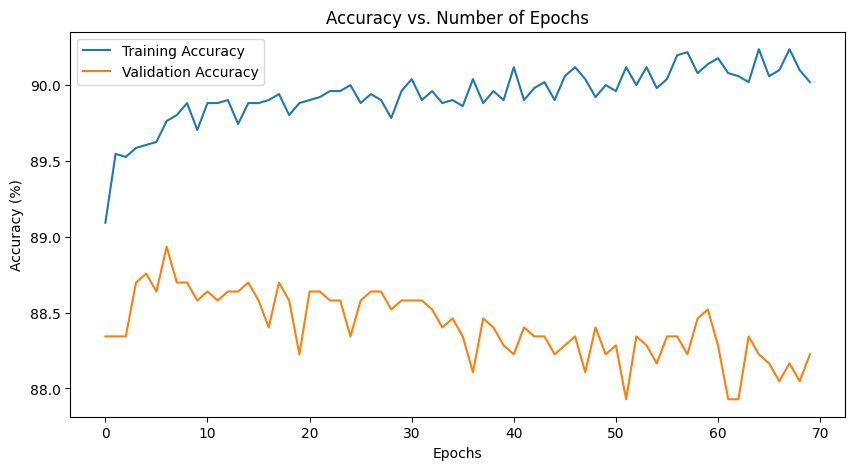

Model saved to model.pth


In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 分离特征和目标变量
features = MergeA_B_endshot[['PX', 'PY', 'PC', 'PDistance', 'PAngle', 'AX', 'AY', 'AC', 'ADistance', 'AAngle', 'PADistance', 'PAngle']]
target = MergeA_B_endshot['Goal']

# 标准化特征
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 转换为 PyTorch 张量
features = torch.tensor(features, dtype=torch.float32)
target = torch.tensor(target.values.astype(np.float32)).unsqueeze(1)

# 创建数据集和加载器
dataset = TensorDataset(features, target)
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10)
test_loader = DataLoader(test_dataset, batch_size=10)

# 模型定义
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(12, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = NeuralNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练和验证模型
num_epochs = 70
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    total, correct = 0, 0
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        predicted = outputs.round()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_acc = 100 * correct / total
    train_accs.append(train_acc)

    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            predicted = outputs.round()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    val_acc = 100 * correct / total
    val_accs.append(val_acc)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%')

# 绘制准确率变化图
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# 保存模型
torch.save(model.state_dict(), 'xA_model.pth')
print('Model saved to model.pth')

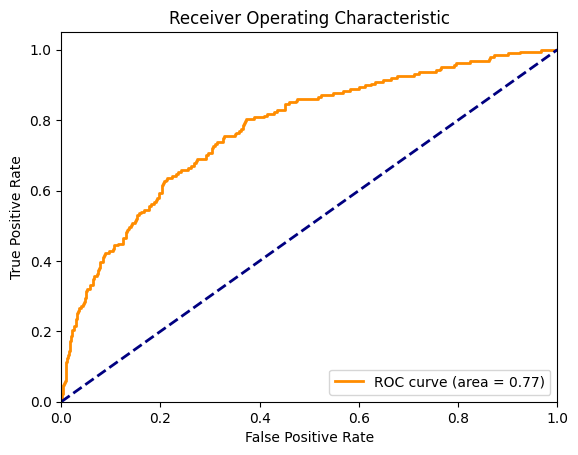

In [20]:
from sklearn.metrics import roc_curve, auc
model.eval()
y_true = []
y_scores = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_scores.extend(outputs.detach().numpy().flatten())  # 收集预测的概率得分
        y_true.extend(labels.detach().numpy().flatten())  # 收集真实标签
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [21]:
# 加载模型
model = NeuralNet()
model.load_state_dict(torch.load('xA_model.pth'))
model.eval()  # 设置模型为评估模式

NeuralNet(
  (fc1): Linear(in_features=12, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [22]:
# 确保模型加载并处于评估模式
model = NeuralNet()
model.load_state_dict(torch.load('xA_model.pth'))
model.eval()  # 设置为评估模式

# 获取 test_data_f 中的特征部分 (与训练时的特征相同)
test_features = MergeA_B_endshot[['PX', 'PY', 'PC', 'PDistance', 'PAngle', 'AX', 'AY', 'AC', 'ADistance', 'AAngle', 'PADistance', 'PAngle']]

# 标准化测试集的特征
test_features_scaled = scaler.transform(test_features)

# 转换为 PyTorch 张量
test_features_tensor = torch.tensor(test_features_scaled, dtype=torch.float32)

# 存储预测概率
predicted_probabilities = []

# 对测试集数据进行预测
with torch.no_grad():
    for data in test_features_tensor:
        probability = model(data.unsqueeze(0)).item()  # 添加 batch 维度
        predicted_probabilities.append(probability)

# 检查预测概率和原始数据的长度是否匹配
print(f"Predicted probabilities length: {len(predicted_probabilities)}")
print(f"Test data length: {len(MergeA_B_endshot)}")

# 确保两者长度相等
if len(predicted_probabilities) == len(MergeA_B_endshot):
    # 将预测的概率值添加到 test_data_f['xA'] 列中
    MergeA_B_endshot['xA'] = predicted_probabilities
else:
    print("Error: Length mismatch between predicted probabilities and test data.")

# 输出添加了预测概率后的 DataFrame
print(MergeA_B_endshot.head())  # 只打印前几行作为示例


Predicted probabilities length: 8451
Test data length: 8451
   eventId           subEventName  \
0        8                  Cross   
1        1               Air duel   
2        1               Air duel   
3        7           Acceleration   
4        1  Ground defending duel   

                                                tags  playerId  \
0  [{'id': 301}, {'id': 402}, {'id': 801}, {'id':...    120339   
1                        [{'id': 703}, {'id': 1801}]    120339   
2                        [{'id': 703}, {'id': 1801}]     14763   
3                                     [{'id': 1801}]      7868   
4  [{'id': 501}, {'id': 1601}, {'id': 701}, {'id'...    192748   

                                  positions  matchId           eventName  \
0  [{'y': 71, 'x': 73}, {'y': 41, 'x': 88}]  2499719                Pass   
1   [{'y': 59, 'x': 7}, {'y': 48, 'x': 15}]  2499719                Duel   
2  [{'y': 52, 'x': 96}, {'y': 52, 'x': 96}]  2499719                Duel   
3  [{'y': 18, 'x

In [23]:
MergeA_B_endshot.loc[0]

eventId                                                         8
subEventName                                                Cross
tags            [{'id': 301}, {'id': 402}, {'id': 801}, {'id':...
playerId                                                   120339
positions                [{'y': 71, 'x': 73}, {'y': 41, 'x': 88}]
matchId                                                   2499719
eventName                                                    Pass
teamId                                                       1609
matchPeriod                                                    1H
eventSec                                                93.961235
subEventId                                                     80
id                                                      177959211
index                                                          45
PX                                                          28.35
PY                                                          48.28
PC        

In [24]:
player_xA_totals = MergeA_B_endshot.groupby('playerId')['xA'].sum().reset_index()

',playerId,xA\n0,0,68.77532073573093\n1,36,0.9000065494328737\n2,38,0.3771368730813265\n3,48,1.646925906650722\n4,54,8.067607771605253\n5,74,0.4347671326249838\n6,93,4.410173831973225\n7,107,1.2793883178383112\n8,116,2.095613137818873\n9,120,0.07817441504448652\n10,132,0.22394434548914433\n11,134,0.621415008790791\n12,160,2.3878491818904877\n13,173,0.5819820370525122\n14,179,0.9171523414552212\n15,261,0.04235467687249184\n16,262,0.9424428874626756\n17,284,1.191369790583849\n18,340,0.7129154270514846\n19,370,3.3915859134867787\n20,383,3.923568963073194\n21,454,1.7549272221513093\n22,466,1.3619319261051714\n23,471,1.3693185523152351\n24,703,1.8705051187425852\n25,3278,0.7820644676685333\n26,3319,5.3290055599063635\n27,3324,6.076325454749167\n28,3326,0.7655148236081004\n29,3327,1.0370192849077284\n30,3348,0.8309117835015059\n31,3350,5.433967348653823\n32,3351,1.614663165062666\n33,3360,1.5650380030274391\n34,3361,6.316667472943664\n35,3413,0.875373131595552\n36,3424,0.6241076728329062\n37

In [25]:
player_xA_totals_sorted = player_xA_totals.sort_values(by='xA', ascending=False).reset_index(drop=True)
player_xA_totals_sorted[:6]

,playerId,xA
0,0,68.775321
1,38021,9.120857
2,120353,8.519657
3,54,8.067608
4,26150,7.703627
5,8422,7.500452


In [26]:
# 加载数据 - 存储到train数据框中
engplayers = pd.DataFrame()  # 初始化一个空的数据框
# 准备空的数据框
path = os.path.join(str(pathlib.Path().resolve()), 'data','players.json')  # 拼接数据文件路径

# 打开JSON文件并读取数据
with open(path) as f:  # 打开指定路径的JSON文件
    data = json.load(f)  # 加载JSON数据到变量data中

# 将数据转换为Pandas DataFrame
engplayers = pd.DataFrame(data)

# 查看数据框的基本信息，如列名、数据类型和内存占用
engplayers.loc[0]

passportArea             {'name': 'Turkey', 'id': '792', 'alpha3code': ...
weight                                                                  78
firstName                                                            Harun
middleName                                                                
lastName                                                             Tekin
currentTeamId                                                         4502
birthDate                                                       1989-06-17
height                                                                 187
role                     {'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...
birthArea                {'name': 'Turkey', 'id': '792', 'alpha3code': ...
wyId                                                                 32777
foot                                                                 right
shortName                                                         H. Tekin
currentNationalTeamId    

In [31]:
# #shotsA = train.loc[train['eventId'] == 10]
# top5_2018_england = engplayers.loc[engplayers['wyId'] == 38021| engplayers['wyId']==120353	|engplayers['wyId']==54 |engplayers['wyId']==26150|engplayers['wyId']==8422]
# top5_2018_england
top5_ids = [38021, 120353, 54, 26150, 8422]  # Cleaner and more readable
top5_2018_england = engplayers.loc[engplayers['wyId'].isin(top5_ids)]
top5_2018_england

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
9,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76,Christian,,Dannemann Eriksen,1624,1992-02-14,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",54,right,C. Eriksen,7712
508,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",68,Kevin,,De Bruyne,1625,1991-06-28,181,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",38021,right,K. De Bruyne,5629
1719,"{'name': 'Egypt', 'id': '818', 'alpha3code': '...",72,Mohamed,,Salah Ghaly,1612,1992-06-15,175,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Egypt', 'id': '818', 'alpha3code': '...",120353,left,Mohamed Salah,16129
3018,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",66,Wilfried,,Zaha,1628,1992-11-10,180,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'C\u00f4te d'Ivoire', 'id': 384, 'alp...",8422,right,W. Zaha,null
3037,"{'name': 'Algeria', 'id': 12, 'alpha3code': 'D...",62,Riyad,,Mahrez,1625,1991-02-21,179,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",26150,left,R. Mahrez,16009


In [36]:
import pandas as pd

# Assuming 'player_xA_totals_sorted' and 'engplayers' are already defined DataFrames

# Merging the DataFrames on the specified keys
engplayers_with_xA = pd.merge(engplayers, player_xA_totals_sorted, 
                              left_on='wyId', right_on='playerId', how='right')
# Display the merged DataFrame
engplayers_with_xA.loc[:6]

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId,playerId,xA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,68.775321
1,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",68.0,Kevin,,De Bruyne,1625,1991-06-28,181.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Belgium', 'id': '56', 'alpha3code': ...",38021.0,right,K. De Bruyne,5629,38021,9.120857
2,"{'name': 'Egypt', 'id': '818', 'alpha3code': '...",72.0,Mohamed,,Salah Ghaly,1612,1992-06-15,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Egypt', 'id': '818', 'alpha3code': '...",120353.0,left,Mohamed Salah,16129,120353,8.519657
3,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",76.0,Christian,,Dannemann Eriksen,1624,1992-02-14,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Denmark', 'id': '208', 'alpha3code':...",54.0,right,C. Eriksen,7712,54,8.067608
4,"{'name': 'Algeria', 'id': 12, 'alpha3code': 'D...",62.0,Riyad,,Mahrez,1625,1991-02-21,179.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",26150.0,left,R. Mahrez,16009,26150,7.703627
5,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",66.0,Wilfried,,Zaha,1628,1992-11-10,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'C\u00f4te d'Ivoire', 'id': 384, 'alp...",8422.0,right,W. Zaha,null,8422,7.500452
6,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",70.0,Sergio Leonel,,Ag\u00fcero del Castillo,1625,1988-06-02,173.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Argentina', 'id': '32', 'alpha3code'...",8325.0,right,S. Ag\u00fcero,12274,8325,6.689180
